# Goal:

Understand how competition is set up.

What are we predicting, what data do we have

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
DIRECTORY = './data/'
calendar = pd.read_csv(DIRECTORY + 'calendar.csv', parse_dates=['date'])
inventory = pd.read_csv(DIRECTORY + 'inventory.csv')
test = pd.read_csv(DIRECTORY + 'sales_test.csv', parse_dates=['date'])
train = pd.read_csv(DIRECTORY + 'sales_train.csv', parse_dates=['date'])
solution = pd.read_csv(DIRECTORY + 'solution.csv')
test_weights = pd.read_csv(DIRECTORY + 'test_weights.csv')

In [83]:
calendar = pd.read_csv(DIRECTORY + 'calendar.csv', parse_dates=['date'])
calendar = calendar.sort_values(by='date')
print("# Days:", len(calendar['date'].unique()))
print("# Days in range:", len(pd.date_range(calendar['date'].min(), calendar['date'].max())))
print(f"Start: {calendar['date'].min().strftime('%m-%d-%Y')}, End: {calendar['date'].max().strftime('%m-%d-%Y')}")

print("# Warehouses:", len(calendar['warehouse'].unique()))
print("Length df:", len(calendar))

calendar['holiday_na'] = calendar['holiday_name'].isna()
percent_warehouses_na = calendar.groupby('date')['holiday_na'].mean().to_frame('percent_warehouses_na')
calendar = calendar.merge(percent_warehouses_na, left_on='date', right_index=True, how='left')

print("Are holidays shared between everyone? No:")
display(percent_warehouses_na.value_counts())

print("Visualizing nonshared holidays")
calendar[~calendar['percent_warehouses_na'].isin([0,1])].tail(10)

# Days: 3288
# Days in range: 3288
Start: 01-01-2016, End: 12-31-2024
# Warehouses: 7
Length df: 23016
Are holidays shared between everyone? No:


percent_warehouses_na
1.000000                 2990
0.857143                  123
0.000000                   66
0.428571                   54
0.714286                   36
0.571429                   19
Name: count, dtype: int64

Visualizing nonshared holidays


,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,holiday_na,percent_warehouses_na
12449,2024-11-01,All Saints Day,1,1,0,0,Budapest_1,False,0.714286
5763,2024-11-01,NaN,0,0,0,0,Prague_1,True,0.714286
17838,2024-11-01,NaN,0,0,0,0,Frankfurt_1,True,0.714286
13134,2024-11-17,NaN,0,0,0,0,Budapest_1,True,0.428571
14895,2024-11-17,Den boje za svobodu a demokracii,1,0,0,0,Brno_1,False,0.428571
14896,2024-11-17,Den boje za svobodu a demokracii,1,0,0,0,Prague_3,False,0.428571
6543,2024-11-17,NaN,0,0,0,0,Munich_1,True,0.428571
16267,2024-11-17,NaN,0,0,0,0,Frankfurt_1,True,0.428571
17524,2024-11-17,Den boje za svobodu a demokracii,1,0,0,0,Prague_2,False,0.428571
100,2024-11-17,Den boje za svobodu a demokracii,1,0,0,0,Prague_1,False,0.428571


Finding: Calendar has every day from 2016 start to 2024 end, per warehouse

Holidays are usually not all-or-nothing (some regions have holidays on a certain day, others don't)


In [59]:
train = train.sort_values(by='date')

In [76]:
print("Train # Days:", len(train['date'].unique()))
print(f"Start: {train['date'].min().strftime('%m-%d-%Y')}, End: {train['date'].max().strftime('%m-%d-%Y')}")
print("Train warehouses:",  len(train['warehouse'].unique()))
print("Train ids:", len(train['unique_id'].unique()))
print("Train len:",  len(train))
print("Id * date:", len(train['date'].unique()) * len(train['unique_id'].unique()))

Train # Days: 1402
Start: 08-01-2020, End: 06-02-2024
Train warehouses: 7
Train ids: 5390
Train len: 4007419
Id * date: 7556780


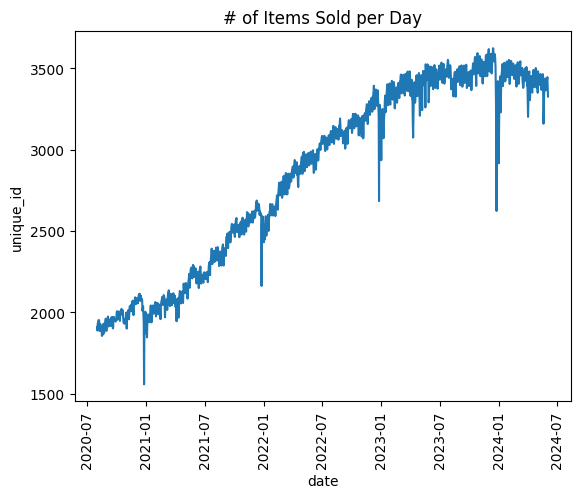

In [82]:
items_per_day = train.groupby(['date'])['unique_id'].count()
plt.title('# of Items Sold per Day')
sns.lineplot(data=items_per_day)
plt.xticks(rotation=90);

Finding: Train is per id - date combo

But the # of items changes over time

Start: 06-03-2024, End: 06-16-2024
Test warehouses: 7
Test ids: 3625
Test len: 47021
Id * date: 50750


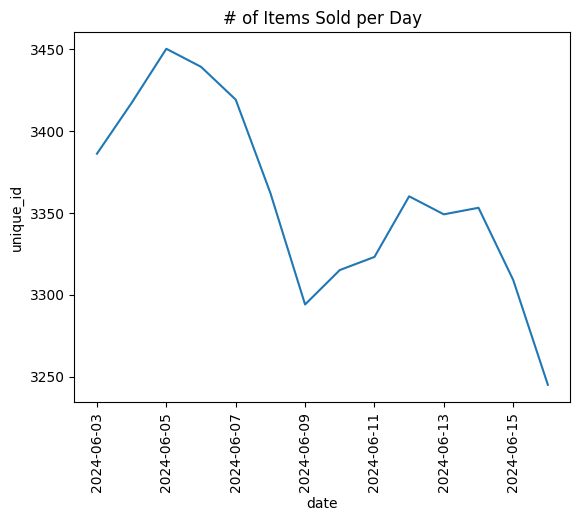

In [104]:
# Same exact thing for test
test = test.sort_values(by='date')
print(f"Start: {test['date'].min().strftime('%m-%d-%Y')}, End: {test['date'].max().strftime('%m-%d-%Y')}")
print("Test warehouses:",  len(test['warehouse'].unique()))
print("Test ids:", len(test['unique_id'].unique()))
print("Test len:",  len(test))
print("Id * date:", len(test['date'].unique()) * len(test['unique_id'].unique()))

items_per_day = test.groupby(['date'])['unique_id'].count()
plt.title('# of Items Sold per Day')
sns.lineplot(data=items_per_day)
plt.xticks(rotation=90);

Finding: Train is only 14 days (short-term)

Number of items seems to be following the same trend as in train

In [111]:
inventory = pd.read_csv(DIRECTORY + 'inventory.csv')
inventory = inventory.sort_values(by=['product_unique_id', 'unique_id'])

print("# Ids:", len(inventory['unique_id'].unique()))
print("# Product Unique Ids:", len(inventory['product_unique_id'].unique()))
print("Len inventory:", len(inventory))
print()

print("# Of Items per Product Id (always 1-4):")
print(inventory.groupby('product_unique_id')['unique_id'].count().value_counts())
print()

print("Look at groups with more than 1 item id:")
is_product_id_unique = (inventory.groupby('product_unique_id')['unique_id'].count() <= 1).to_frame('is_product_id_unique')
inventory = inventory.merge(is_product_id_unique, right_index=True, left_on='product_unique_id', how='left')
display(inventory[~inventory['is_product_id_unique']])

# Ids: 5432
# Product Unique Ids: 2670
Len inventory: 5432

# Of Items per Product Id (always 1-4):
unique_id
1    1430
4     659
2     377
3     204
Name: count, dtype: int64

Look at groups with more than 1 item id:


,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse,is_product_id_unique
3849,1,1,Blueberry_0,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_1,Fruit and vegetable_L4_1,Frankfurt_1,False
4146,2,1,Blueberry_0,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_1,Fruit and vegetable_L4_1,Munich_1,False
4617,5,4,Onion_0,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_3,Fruit and vegetable_L4_1,Frankfurt_1,False
2222,6,4,Onion_0,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_3,Fruit and vegetable_L4_1,Munich_1,False
4802,9,7,Pastry_0,Bakery,Bakery_L2_5,Bakery_L3_6,Bakery_L4_1,Prague_1,False
...,...,...,...,...,...,...,...,...,...
151,5425,2666,Sandwich_4,Bakery,Bakery_L2_29,Bakery_L3_100,Bakery_L4_1,Munich_1,False
5120,5428,2669,Chicken_102,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Brno_1,False
762,5429,2669,Chicken_102,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Prague_1,False
542,5430,2669,Chicken_102,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Prague_3,False


In [122]:
print("# Names:", len(inventory['name'].unique()))
inventory['name_first'] = inventory['name'].str.split('_').str[0]
print("# Name first parts:", len(inventory['name_first'].unique()))

inventory.groupby('name_first')['product_unique_id'].unique().apply(len).sort_values(ascending=False)

# Names: 2670
# Name first parts: 177


name_first
Bread      231
Pastry     203
Apple      137
Tomato     121
Chicken    103
          ... 
Drink        1
Bakery       1
Brioche      1
Milling      1
Burger       1
Name: product_unique_id, Length: 177, dtype: int64

In [123]:
# Levels
for level in np.arange(1, 5):
    col_name = f'L{level}_category_name_en'
    count = len(inventory[col_name].unique())
    print(col_name, count)

L1_category_name_en 3
L2_category_name_en 47
L3_category_name_en 177
L4_category_name_en 68


In [129]:
print("Per name first, how mnay L3 categories:")
display(inventory.groupby('name_first')['L3_category_name_en'].unique().apply(len))

inventory[inventory['name_first'] == 'Apple']

Per name first, how mnay L3 categories:


name_first
Apple         6
Apricot       5
Arugula       5
Asparagus     7
Avocado       4
             ..
Waffle        2
Watermelon    4
Wrap          2
Yogurt        1
Zucchini      4
Name: L3_category_name_en, Length: 177, dtype: int64

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse,is_product_id_unique,name_first
904,43,23,Apple_0,Fruit and vegetable,Fruit and vegetable_L2_12,Fruit and vegetable_L3_20,Fruit and vegetable_L4_1,Prague_1,False,Apple
665,44,23,Apple_0,Fruit and vegetable,Fruit and vegetable_L2_12,Fruit and vegetable_L3_20,Fruit and vegetable_L4_1,Prague_2,False,Apple
1232,45,23,Apple_0,Fruit and vegetable,Fruit and vegetable_L2_12,Fruit and vegetable_L3_20,Fruit and vegetable_L4_1,Prague_3,False,Apple
4244,46,23,Apple_0,Fruit and vegetable,Fruit and vegetable_L2_12,Fruit and vegetable_L3_20,Fruit and vegetable_L4_1,Brno_1,False,Apple
2158,138,63,Apple_1,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_31,Fruit and vegetable_L4_1,Frankfurt_1,True,Apple
...,...,...,...,...,...,...,...,...,...,...
4438,5151,2530,Apple_133,Fruit and vegetable,Fruit and vegetable_L2_0,Fruit and vegetable_L3_58,Fruit and vegetable_L4_22,Budapest_1,True,Apple
75,5196,2557,Apple_134,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_31,Fruit and vegetable_L4_1,Munich_1,True,Apple
4245,5211,2565,Apple_135,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_31,Fruit and vegetable_L4_1,Munich_1,False,Apple
1649,5212,2565,Apple_135,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_31,Fruit and vegetable_L4_1,Frankfurt_1,False,Apple


Note: L3 seems to be the same different as first part of name, even though same length

Findings:
- there are 5432 unique ids, but only 2670 products
- per product, there are 1-4 unique ids (dif. id if in differnet workshop)

- there are multiple products with the same name start as well (different skews)
- some things have many skews (there are 231 breads)